In [ ]:
# !pip install pyspellchecker
!pip install transformers
!pip install pymystem3
# !pip install pymorphy2
!pip install datasets
!pip install pyclustering

# !python -m spacy download ru_core_news_sm

In [ ]:
from datasets import load_dataset
import json
def get_dataset_dict():
  _dataset = load_dataset('abobster/rosatom-clustering')
  return json.loads(_dataset['train']['text'][0])

In [ ]:
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeClassifier
from nltk.stem import WordNetLemmatizer
import nltk
import pandas as pd
import numpy as np


nltk.download('stopwords')
#nltk.download('punkt')
nltk.download('all')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!

True

#–§—É–Ω–∫—Ü–∏–∏

In [ ]:
import re
import nltk
import pymystem3
from nltk.corpus import stopwords
from string import punctuation

nltk.download("stopwords")
russian_stopwords = set(stopwords.words("russian"))
#Create lemmatizer and stopwords list
mystem = pymystem3.mystem.Mystem()

def prep_text(data_texts):
  documents = []

  stemmer = WordNetLemmatizer()

  for sen in range(0, len(data_texts)):
      # Remove all the special characters
      document = re.sub(r'\W', ' ', str(data_texts[sen]))

      # remove all single characters
      document = re.sub(r'\s+[a-zA-Z–∞-—è–ê-–Ø0-9]\s+', ' ', document)

      # Remove single characters from the start
      document = re.sub(r'\^[a-zA-Z–∞-—è–ê-–Ø0-9]\s+', ' ', document)

      # Substituting multiple spaces with single space
      document = re.sub(r'\s+', ' ', document, flags=re.I)

      document = re.sub("—ë", "–µ", document.lower())

      # Removing prefixed 'b'
      document = re.sub(r'^b\s+', '', document)

      # Converting to Lowercase
      document = document.lower()

      # Lemmatization
      tokens = mystem.lemmatize(document)
      new_tokens = list()
      for token in tokens:
        if token not in russian_stopwords and token != " " :
          if token.strip() not in punctuation:
            #if len(token) > 2:
            new_tokens.append(token)
      document = ' '.join(new_tokens)

      documents.append(document)

  return documents

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#–ó–∞–≥—Ä—É–∑–∫–∞ –¥–∞–Ω–Ω—ã—Ö

In [ ]:
data = get_dataset_dict()

In [ ]:
 data["24268"]

{'question': '–ß—Ç–æ –æ–∂–∏–¥–∞–µ—Ç–µ –æ—Ç —Å–µ–≥–æ–¥–Ω—è—à–Ω–µ–≥–æ –¥–Ω—è',
 'id': 24268,
 'answers': [{'answer': '–±–æ–¥—Ä–æ–µ',
   'count': 1,
   'cluster': '–±–æ–¥—Ä–æ–µ',
   'sentiment': 'positives'},
  {'answer': '–±–æ–ª—å—à–µ –∑–Ω–∞–∫–æ–º—Å—Ç–≤!',
   'count': 1,
   'cluster': '–∑–Ω–∞–∫–æ–º—Å—Ç–≤–∞',
   'sentiment': 'neutrals',
   'corrected': '–±–æ–ª—å—à–µ –∑–Ω–∞–∫–æ–º—Å—Ç–≤'},
  {'answer': '–∑–Ω–∞–∫–æ–º—Å—Ç–≤–∞',
   'count': 3,
   'cluster': '–∑–Ω–∞–∫–æ–º—Å—Ç–≤–∞',
   'sentiment': 'neutrals'},
  {'answer': '–∑–Ω–∞–∫–æ–º—Å—Ç–≤–æ —Å –∏–Ω—Ç–µ—Ä–µ—Å–Ω—ã–º–∏ –ª—é–¥—å–º',
   'count': 1,
   'cluster': '–∑–Ω–∞–∫–æ–º—Å—Ç–≤–∞',
   'sentiment': 'positives',
   'corrected': '–∑–Ω–∞–∫–æ–º—Å—Ç–≤–æ —Å –∏–Ω—Ç–µ—Ä–µ—Å–Ω—ã–º–∏ –ª—é–¥—å–º–∏'},
  {'answer': '–∏–Ω—Ç–µ—Ä–µ—Å–Ω—ã—Ö –∑–Ω–∞–∫–æ–º—Å—Ç–≤',
   'count': 1,
   'cluster': '–∑–Ω–∞–∫–æ–º—Å—Ç–≤–∞',
   'sentiment': 'positives'},
  {'answer': '–∫–æ–Ω—Ç–∞–∫—Ç—ã',
   'count': 1,
   'cluster': '–Ω–æ–≤—ã–µ –∫–æ–Ω—Ç–∞–∫—Ç—ã',
   'sentiment': 'neutrals

In [ ]:
answers = [ans["answer"] for ans in data["24268"]["answers"]]
true_clusters = [ans["cluster"] for ans in data["24268"]["answers"]] # 27855

In [ ]:
prepared_texts = prep_text(answers)

#RuBert

In [ ]:
import torch
from transformers import BertModel, BertTokenizer

# –ó–∞–≥—Ä—É–∑–∫–∞ –ø—Ä–µ–¥–æ–±—É—á–µ–Ω–Ω–æ–π –º–æ–¥–µ–ª–∏ RuBERT
model_name = 'DeepPavlov/rubert-base-cased'
tokenizer = BertTokenizer.from_pretrained(model_name)
bert_model = BertModel.from_pretrained(model_name)

Some weights of the model checkpoint at DeepPavlov/rubert-base-cased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:

def get_rubert_text_embedding(text):
  # –¢–æ–∫–µ–Ω–∏–∑–∞—Ü–∏—è —Ç–µ–∫—Å—Ç–∞
  x_inputs = list()
  tokens = tokenizer.tokenize(text)
  token_ids = tokenizer.convert_tokens_to_ids(tokens)
  # –î–æ–±–∞–≤–ª–µ–Ω–∏–µ —Ç–æ–∫–µ–Ω–∞ –Ω–∞—á–∞–ª–∞ –∏ –∫–æ–Ω—Ü–∞ –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç–∏
  token_ids = [tokenizer.cls_token_id] + token_ids + [tokenizer.sep_token_id]
  x_inputs.append(token_ids)

  # –ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –≤ —Ç–µ–Ω–∑–æ—Ä
  input_ids = torch.tensor(x_inputs)

  # –ü–æ–ª—É—á–µ–Ω–∏–µ —ç–º–±–µ–¥–¥–∏–Ω–≥–∞ –ø—Ä–µ–¥–ª–æ–∂–µ–Ω–∏—è
  with torch.no_grad():
      outputs = bert_model(input_ids)
      sentence_embedding = outputs.last_hidden_state.mean(dim=1).squeeze()

  # –í—ã–≤–æ–¥ —ç–º–±–µ–¥–¥–∏–Ω–≥–∞ –ø—Ä–µ–¥–ª–æ–∂–µ–Ω–∏—è
  return sentence_embedding

#–ö–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏—è

In [ ]:
#bert_embeddings = [get_text_embedding(txt).numpy() for txt in prepared_texts]

In [ ]:
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics.pairwise import cosine_similarity

def determine_k(embeddings):
    k_min = 10

    clusters = [x for x in range(2, k_min * 3)]

    metrics = []

    for i in clusters:
        print(i, '/', len(clusters))
        metrics.append((KMeans(n_clusters=i).fit(embeddings)).inertia_)

    k = elbow(k_min, clusters, metrics)
    return k

def elbow(k_min, clusters, metrics):
    score = []

    for i in range(k_min, clusters[-3]):
        y1 = np.array(metrics)[:i + 1]
        y2 = np.array(metrics)[i:]

        df1 = pd.DataFrame({'x': clusters[:i + 1], 'y': y1})
        df2 = pd.DataFrame({'x': clusters[i:], 'y': y2})

        reg1 = LinearRegression().fit(np.asarray(df1.x).reshape(-1, 1), df1.y)
        reg2 = LinearRegression().fit(np.asarray(df2.x).reshape(-1, 1), df2.y)

        y1_pred = reg1.predict(np.asarray(df1.x).reshape(-1, 1))
        y2_pred = reg2.predict(np.asarray(df2.x).reshape(-1, 1))

        score.append(mean_squared_error(y1, y1_pred) + mean_squared_error(y2, y2_pred))

    return np.argmin(score) + k_min

In [ ]:
answer_vectorizer = TfidfVectorizer()
answer_vectorizer.fit(prepared_texts)
answer_vects = answer_vectorizer.transform(prepared_texts).toarray()

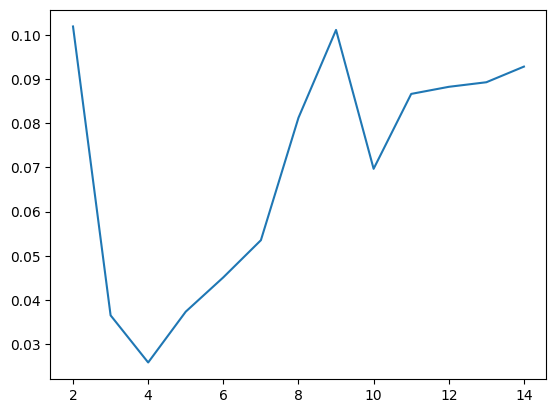

In [ ]:
import matplotlib.pyplot as plt

k_min = 15
clusters = [x for x in range(2, k_min)]
metrics = []
for i in clusters:
    kmeans = KMeans(n_clusters = i, random_state = 42, n_init='auto')
    kmeans.fit(embeddings)
    sil_score = silhouette_score(embeddings, kmeans.labels_, metric='euclidean')
    metrics.append(sil_score)

plt.plot(clusters, metrics)

In [ ]:
!wget https://rusvectores.org/static/models/rusvectores4/RNC/ruscorpora_upos_skipgram_300_5_2018.vec.gz

--2023-09-09 19:01:52--  https://rusvectores.org/static/models/rusvectores4/RNC/ruscorpora_upos_skipgram_300_5_2018.vec.gz
Resolving rusvectores.org (rusvectores.org)... 172.104.228.108
Connecting to rusvectores.org (rusvectores.org)|172.104.228.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 199864398 (191M) [application/x-gzip]
Saving to: ‚Äòruscorpora_upos_skipgram_300_5_2018.vec.gz‚Äô

ruscorpora_upos_ski 100%[===================>] 190.61M  18.9MB/s    in 12s     

2023-09-09 19:02:04 (16.3 MB/s) - ‚Äòruscorpora_upos_skipgram_300_5_2018.vec.gz‚Äô saved [199864398/199864398]



In [ ]:
from gensim.models import KeyedVectors
from gensim.models.phrases import Phrases, Phraser

words_lists = [ans.split() for ans in prepared_texts]

model = KeyedVectors.load_word2vec_format('ruscorpora_upos_skipgram_300_5_2018.vec.gz', binary=False)


In [ ]:
for n in model.most_similar(positive=['–∫–æ–Ω—Ç–∞–∫—Ç_NOUN']):
    print( n[0], n[1])

np.mean([model[word] for word in words_lists], axis=0)

–æ–±—â–µ–Ω–∏–µ_NOUN 0.6105278730392456
—Å–æ–ø—Ä–∏–∫–æ—Å–Ω–æ–≤–µ–Ω–∏–µ_NOUN 0.5869833827018738
–∫–æ–Ω—Ç–∞–∫—Ç_PROPN 0.5580770969390869
—Å–≤—è–∑—å_NOUN 0.5573739409446716
–≤–∑–∞–∏–º–æ–¥–µ–π—Å—Ç–≤–∏–µ_NOUN 0.5526005029678345
–∫–æ–Ω—Ç–∞–∫—Ç—ã_NOUN 0.5353706479072571
—Å–Ω–æ—à–µ–Ω–∏–µ_NOUN 0.5326734781265259
–∫–æ–Ω—Ç–∞–∫—Ç–∏—Ä–æ–≤–∞—Ç—å_VERB 0.5297574996948242
–≤–∑–∞–∏–º–æ–ø–æ–Ω–∏–º–∞–Ω–∏–µ_NOUN 0.5048564076423645
–≤–∑–∞–∏–º–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–µ_NOUN 0.4884534478187561


KeyError: ignored

In [ ]:
w2v_model.wv.most_similar(positive=["–∫–æ–Ω—Ç–∞–∫—Ç"])

In [ ]:
determine_k(answer_vects)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture
n_clusters = 12

kmeans = KMeans(n_clusters = n_clusters, random_state = 42, n_init='auto', )
kmeans.fit(answer_vects)

KMeans(n_clusters=12, n_init='auto', random_state=42)

In [ ]:
gmm = GaussianMixture(n_components=n_clusters)
gmm.fit(bert_embeddings)

In [ ]:
cluster_num = 1

labels = gmm.predict(bert_embeddings)
 #labels = kmeans.labels_
for cluster_n in range(n_clusters):
  print(cluster_n)
  for i in range(len(answers)):
    if labels[i] == cluster_n:
      print(answers[i])
  print()

NameError: ignored

In [ ]:
prepared_texts

['–±–æ–¥—Ä—ã–π',
 '–∑–Ω–∞–∫–æ–º—Å—Ç–≤–æ',
 '–∑–Ω–∞–∫–æ–º—Å—Ç–≤–æ',
 '–∑–Ω–∞–∫–æ–º—Å—Ç–≤–æ –∏–Ω—Ç–µ—Ä–µ—Å–Ω—ã–π –ª—é–¥—å–º–∞',
 '–∏–Ω—Ç–µ—Ä–µ—Å–Ω—ã–π –∑–Ω–∞–∫–æ–º—Å—Ç–≤–æ',
 '–∫–æ–Ω—Ç–∞–∫—Ç',
 '–ª–∏—á–Ω—ã–π –∑–Ω–∞–∫–æ–º—Å—Ç–≤–æ',
 '–Ω–µ—Ç–≤–æ—Ä–∫–∏–Ω–≥',
 '–Ω–æ–≤—ã–π –¥–µ–ª–æ–≤–æ–π –∫–æ–Ω—Ç–∞–∫—Ç',
 '–Ω–æ–≤—ã–π –∑–Ω–∞–∫–æ–º—Å—Ç–≤–æ',
 '–Ω–æ–≤—ã–π –∫–æ–Ω—Ç–∞–∫—Ç',
 '–Ω–æ–≤—ã–π –∫–æ–Ω—Ç–∞–∫—Ç –∑–Ω–∞–∫–æ–º—Å—Ç–≤–æ',
 '–Ω–æ–≤—ã–π –æ—Ç–Ω–æ—à–µ–Ω–∏–µ',
 '–Ω–æ–≤—ã–π —Å–≤—è–∑—å',
 '–Ω–æ–≤—ã–π –¥—Ä—É–≥',
 '–Ω–æ–≤—ã–π –∑–Ω–∞–∫–æ–º—Å—Ç–≤–æ',
 '–ø–æ–∑–Ω–∞–∫–æ–º–∏—Ç—å—Å—è',
 '–ø–æ–∑–Ω–∞–∫–æ–º–∏—Ç—å—Å—è',
 '–ø–æ–ª–µ–∑–Ω—ã–π –∫–æ–Ω—Ç–∞–∫—Ç',
 '–ø–æ–ª–µ–∑–Ω—ã–π –∑–Ω–∞–∫–æ–º—Å—Ç–≤–æ',
 '—É—Å—Ç–∞–Ω–æ–≤–∫–∞ –∫–æ–Ω—Ç–∞–∫—Ç',
 '–≤–∞–∫–∞–Ω—Å–∏—è',
 '–≤–¥–æ—Ö–Ω–æ–≤–µ–Ω–∏–µ',
 '–≤–µ—Å–µ–ª–∏–µ',
 '–ø—Ä–æ–≤–æ–¥–∏—Ç—å –≤—Ä–µ–º—è',
 '–≤–∫—É—Å–Ω—è—à–∫–∞',
 '–µ–¥–∞',
 '–µ—Ö–∞—Ç—å',
 '–≤—Å—Ç—Ä–µ—á–∞ –¥—Ä—É–≥',
 '–∑–Ω–∞–∫–æ–º—Å—Ç–≤–æ –æ–±–º–µ–Ω—è—Ç—å—Å—è –æ–ø—ã—Ç',
 '–∑–Ω–∞–Ω–∏–µ',
 '–∑–Ω–∞–Ω–∏–µ',
 '–∑–Ω–∞–Ω–∏–µ',
 '

['#000000', '#155555', '#2aaaaa', '#3fffff', '#555554', '#6aaaa9', '#7ffffe', '#955553', '#aaaaa8', '#bffffd', '#d55552', '#eaaaa7']


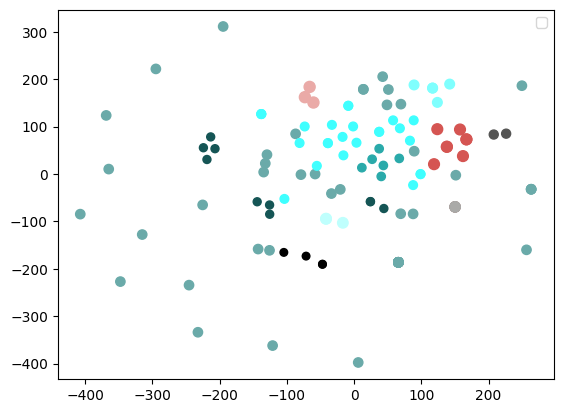

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# –û–ø—Ä–µ–¥–µ–ª—è–µ–º –º–æ–¥–µ–ª—å –∏ —Å–∫–æ—Ä–æ—Å—Ç—å –æ–±—É—á–µ–Ω–∏—è
model = TSNE(random_state=42)

# –û–±—É—á–∞–µ–º –º–æ–¥–µ–ª—å
transformed = model.fit_transform(np.array(answer_vects))

# –ü—Ä–µ–¥—Å—Ç–∞–≤–ª—è–µ–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç –≤ –¥–≤—É–º–µ—Ä–Ω—ã—Ö –∫–æ–æ—Ä–¥–∏–Ω–∞—Ç–∞—Ö
x_axis = transformed[:, 0]
y_axis = transformed[:, 1]

colors = ["#" + hex(((0xFFFFFF) // n_clusters) * i ).replace("0x", "").zfill(6)
        for i in range(n_clusters)]

print(colors)
color_points = [colors[i] for i in kmeans.labels_]

plt.scatter(x_axis, y_axis, c=color_points, s=[30*((i/n_clusters)*1.2 + 1) for i in kmeans.labels_])
plt.legend()
plt.show()

In [ ]:
from pyclustering.cluster.kmeans import kmeans
from pyclustering.utils.metric import type_metric, distance_metric
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer


#user_function = lambda point1, point2: euclidean_distance(point1, point2)
#metric = distance_metric(type_metric.USER_DEFINED, func=user_function)
metric = distance_metric(type_metric.EUCLIDEAN)

# bert_embeddings
# create K-Means algorithm with specific distance metric
start_centers = kmeans_plusplus_initializer(answer_vects, 10).initialize()
kmeans_instance = kmeans(answer_vects, start_centers, metric=metric)

# run cluster analysis and obtain results
kmeans_instance.process()
pycl_clusters = kmeans_instance.get_clusters()

In [ ]:
 #labels = kmeans.labels_
for i, cluster in enumerate(pycl_clusters):
  print(i)
  for j in cluster:
    print(answers[j], "processed:" ,prepared_texts[j])
  print()

In [ ]:

sum_answers = list()
for i, cluster in enumerate(pycl_clusters):
  cluster_answers = list()
  for ans in cluster:
    cluster_answers.append(prepared_texts[ans])
  sum_answers.append(" ".join(cluster_answers))


vectorizer = TfidfVectorizer()
vectorizer.fit(sum_answers)
tfidf_vects = vectorizer.transform(sum_answers).toarray()
feature_names = vectorizer.get_feature_names_out()

for i, cluster in enumerate(pycl_clusters):
  features = list(zip(feature_names, tfidf_vects[i]))
  print(i)
  print(sorted(features, key=lambda s: s[1], reverse=True)[:5])

0
[('–∏–Ω—Ç–µ—Ä–µ—Å–Ω—ã–π', 0.42400370193300213), ('–∑–Ω–∞–∫–æ–º—Å—Ç–≤–æ', 0.3153440558146779), ('–∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è', 0.3028597870950015), ('–ø–æ–ª–µ–∑–Ω—ã–π', 0.3028597870950015), ('–æ–ø—ã—Ç', 0.2422878296760012)]
1
[('–ø–æ–Ω–∏–º–∞—Ç—å', 0.8944271909999159), ('–ª–µ–≥–æ—á–µ—Ç—å', 0.4472135954999579), ('it', 0.0), ('–∞–∫—Ç—É–∞–ª—å–Ω—ã–π', 0.0), ('–∞–ø', 0.0)]
2
[('–µ–¥–∞', 0.6324555320336759), ('–º–µ—Ä—á', 0.6324555320336759), ('–±–æ–¥—Ä—ã–π', 0.31622776601683794), ('–ø–æ—Å–ø–∞—Ç—å', 0.31622776601683794), ('it', 0.0)]
3
[('–∑–Ω–∞–Ω–∏–µ', 0.9340172003684366), ('–Ω–æ–≤—ã–π', 0.30873605932325765), ('–∞–∫—Ç—É–∞–ª—å–Ω—ã–π', 0.1037796889298263), ('–≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç—å', 0.08822221690050341), ('—Å—á–∞—Å—Ç–∏–µ', 0.08822221690050341)]
4
[('–∫–∞–π—Ñ', 1.0), ('it', 0.0), ('–∞–∫—Ç—É–∞–ª—å–Ω—ã–π', 0.0), ('–∞–ø', 0.0), ('–±–æ–¥—Ä—ã–π', 0.0)]
5
[('—Ç—Ä–µ–Ω–¥', 0.7606980520365577), ('–≤—Ä–µ–º—è', 0.25356601734551926), ('–∏—Ç–∞', 0.25356601734551926), ('–∫—Ä—É–≥–æ–∑–æ—Ä', 0.25356601734551926), ('–ø

In [ ]:
# —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ —Å–æ–±—Å—Ç–≤–µ–Ω–Ω–æ–≥–æ tfidf
from collections import Counter

all_words = Counter()
clusters_counters = list()
sum_answers = list()
for i, cluster in enumerate(pycl_clusters):
  cluster_answers = list()
  cluster_counter = Counter()

  for ans in cluster:
    cluster_answers.append(prepared_texts[ans])
    cluster_counter.update(prepared_texts[ans].split())
    all_words.update(cluster_counter)

  clusters_counters.append(cluster_counter)
  all_words.update(cluster_counter)

for i, cluster in enumerate(pycl_clusters):
  words_importance = [(word, clusters_counters[i][word] / all_words[word]) for word in clusters_counters[i]]
  print(sorted(words_importance, key=lambda s: s[1], reverse=True)[:5])
print()

In [ ]:
!git clone https://github.com/atefm/pDMM
%cd pDMM
!python setup.py install

In [ ]:
import os, sys
sys.path.append(os.getcwd())
import pdmm
pdmm_data = [ans.split() for ans in prepared_texts]
corpus = pdmm.Corpus.from_iterable_of_word_lists(pdmm_data)
model = pdmm.GibbsSamplingDMM(corpus)
model.randomly_initialise_topic_assignment()
model.inference(number_of_iterations=100)

model.document_topic_assignments

for cluster_n in range(model.number_of_topics):
  print(cluster_n)
  for i in range(len(answers)):
    if model.document_topic_assignments[i] == cluster_n:
      print(answers[i])
  print()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer.fit(prepared_texts)

sorted(vectorizer.vocabulary_.items(), key=lambda s: s[1], reverse=True)

sorted(tdidf_obj, key=lambda s: s[1], reverse=True)


#SpreaderHat

In [ ]:
from pyclustering.cluster.kmeans import kmeans as pycl_kmeans
from pyclustering.cluster.elbow import elbow as pycl_elbow
from pyclustering.utils.metric import type_metric, distance_metric
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
from pyclustering.cluster.hsyncnet import hsyncnet




class SpreaderHat:
    def __init__(self, n_clusters="auto"):
        self.n_clusters = n_clusters
        self.kmeans_instance = None

    def train(self, train_data):
        if type(self.n_clusters) != int:
            elbow_instance = pycl_elbow(train_data, 2, len(train_data)//4)
            elbow_instance.process()
            self.n_clusters = elbow_instance.get_amount()

        metric = distance_metric(type_metric.EUCLIDEAN)
        start_centers = kmeans_plusplus_initializer(train_data, self.n_clusters).initialize()
        self.model = pycl_kmeans(train_data, start_centers, metric=metric)
        self.model.process()
        #self.model = hsyncnet(train_data, self.n_clusters, ccore = True)
        # run cluster analysis and output dynamic of the network
        #(time, dynamic) =  self.model.process()

    def get_clusters(self):
        return self.model.get_clusters()

    def get_most_importance_cluster_words(self, prepared_texts, top=5):
        sum_answers = list()
        pycl_clusters = self.model.get_clusters()
        for i, cluster in enumerate(pycl_clusters):
            cluster_answers = list()
            for ans in cluster:
                cluster_answers.append(prepared_texts[ans])
            sum_answers.append(" ".join(cluster_answers))

        vectorizer = TfidfVectorizer()
        vectorizer.fit(sum_answers)
        tfidf_vects = vectorizer.transform(sum_answers).toarray()
        feature_names = vectorizer.get_feature_names_out()

        result = dict()
        for i, cluster in enumerate(pycl_clusters):
            features = list(zip(feature_names, tfidf_vects[i]))
            features.sort(key=lambda s: s[1], reverse=True)
            top_features = features[:top]
            result[i] = {k:v for k,v in top_features}

        return result


#TextPreprocessor

In [ ]:
import re
import nltk
import pymystem3
from nltk.corpus import stopwords
from string import punctuation

# from profanity_filter import ProfanityFilter


class BadWordChecker:
    def __init__(self):
        !gdown 1XeuHQ13N4XYBBH5naE5riUlPVU-KczAf
        with open("bad_words.txt", "r") as f:
            self.words = set([i.replace("\n", "") for i in f.readlines()])

    def is_bad_word(self, word):
        return word in self.words

    def is_bad_text(self, text):
        return len(set(text) & self.words) > 0


class EmojiConverter:
    def __init__(self):
        !gdown 1GyWCwQyyWUW_Jt9jh3ZXN0xQkhgWQ39A
        self.d = dict()
        with open("emoji_dataset.txt", "r") as f:
            f = f.readlines()[0].split("@")
            for i in f:
                a, b = i.split(";")
                self.d[a] = b

    def convert_string(self, s):
        for i in self.d.keys():
            s = s.replace(i, f" {self.d[i]} ")
        return s


# stemmer = WordNetLemmatizer()

# Create lemmatizer and stopwords list
nltk.download("stopwords")
russian_stopwords = set(stopwords.words("russian"))
mystem = pymystem3.mystem.Mystem()
emoji_converter = EmojiConverter()
bad_word_checker = BadWordChecker()
# pf = ProfanityFilter(languages=["ru", "en"])


class TextPreprocessor:
    def __init__(self, texts):
        self.raw_documents = texts
        self.prepared_texts = ""

    def lemmatize_text(self, document):
        tokens = mystem.lemmatize(document)
        new_tokens = list()
        for token in tokens:
            if token not in russian_stopwords and token != " ":
                if token.strip() not in punctuation:
                    # if len(token) > 2:
                    new_tokens.append(token)
        document = " ".join(new_tokens)

        return document

    def is_bad_text(self, text):
        return bad_word_checker.is_bad_text(text)

    def clean_texts(
        self,
        texts=None,
        lemmatization=True,
        emoji_decode=True,
        only_censored_texts=True,
    ):
        """
        Remove all the special characters
        Remove all single characters
        Remove single characters from the start
        Substituting multiple spaces with single space
        Replace the "—ë" with an "–µ"
        Converting to lowercase
        and other optional functions
        """

        only_censored_texts = lemmatization & only_censored_texts

        if texts is None:
            texts = self.raw_documents
        documents = []

        for sen in range(0, len(texts)):
            document = str(texts[sen])

            if emoji_decode:
                document = emoji_converter.convert_string(document)
            # Remove all the special characters
            document = re.sub(r"\W", " ", document)
            # remove all single characters
            document = re.sub(r"\s+[a-zA-Z–∞-—è–ê-–Ø0-9]\s+", " ", document)
            # Remove single characters from the start
            document = re.sub(r"\^[a-zA-Z–∞-—è–ê-–Ø0-9]\s+", " ", document)
            # Substituting multiple spaces with single space
            document = re.sub(r"\s+", " ", document, flags=re.I)
            document = re.sub("—ë", "–µ", document.lower())
            # Removing prefixed 'b'
            document = re.sub(r"^b\s+", "", document)
            # Converting to lowercase
            document = document.lower()

            # Lemmatization
            if lemmatization:
                document = self.lemmatize_text(document)

                if only_censored_texts:
                    if self.is_bad_text(document):
                        continue
            documents.append(document)
        self.prepared_texts = documents
        return documents


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Downloading...
From: https://drive.google.com/uc?id=1GyWCwQyyWUW_Jt9jh3ZXN0xQkhgWQ39A
To: /content/emoji_dataset.txt
100% 235k/235k [00:00<00:00, 37.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XeuHQ13N4XYBBH5naE5riUlPVU-KczAf
To: /content/bad_words.txt
100% 92.5k/92.5k [00:00<00:00, 69.4MB/s]


In [ ]:
print(*russian_stopwords, sep="\n")

—Ç–∞–∫
—Ç–æ–∂–µ
—ç—Ç–æ—Ç
–≤–æ
–º–æ—è
–±—ã–ª–∞
–∑–¥–µ—Å—å
–Ω–∏—Ö
—ç—Ç–∏
–∫–∞–∫
—á—Ç–æ–±
–ø–æ–¥
–∏—Ö
–Ω–∏
–∏–Ω–æ–≥–¥–∞
–±—ã
—Ç–µ–ø–µ—Ä—å
–æ
–¥–ª—è
–Ω–µ–π
–µ–≥–æ
–∏–ª–∏
—Ç–µ–±—è
—Ç–æ
–º–µ–∂–¥—É
–≤–∞–º
–∂–µ
–≤—ã
—á—É—Ç—å
–æ–Ω–∞
–≤—Å–µ—Ö
–±—É–¥—Ç–æ
—ç—Ç–æ–≥–æ
–∫–æ–≥–¥–∞
–µ–π
–æ—Ç
—Ç—Ä–∏
–Ω–µ–ª—å–∑—è
–º–æ–∂–µ—Ç
–æ–Ω–∏
—ç—Ç–æ–π
–ª—É—á—à–µ
–∫–∞–∫–æ–π
—Ç–æ–º
–±—ã—Ç—å
–º—ã
—Å–∞–º
–¥–≤–∞
–º–Ω–æ–≥–æ
—Ö–æ—Ä–æ—à–æ
–æ–±
–ø–æ
—á–µ–≥–æ
–∑–∞—á–µ–º
–∫—É–¥–∞
—Å
—Å–µ–π—á–∞—Å
–≤–ø—Ä–æ—á–µ–º
–º–Ω–µ
–∫
—Ç–æ—Ç
–∞
–µ–µ
–≤
–Ω–µ–µ
–ø–æ—Å–ª–µ
–≥–¥–µ
–ø–µ—Ä–µ–¥
—á—Ç–æ
–±–µ–∑
—Å–≤–æ—é
–Ω–∏–º
–ø–æ—Ç–æ–º—É
–ø—Ä–∏
–±—ã–ª–∏
–±—É–¥–µ—Ç
—É–∂
–±–æ–ª—å—à–µ
–Ω–∞–¥
–±—ã–ª–æ
–≤–µ–¥—å
–∏
—è
–Ω–∏—á–µ–≥–æ
—Ç–∞–º
—Ç—É—Ç
–¥–∞
–Ω–∏–±—É–¥—å
–≤–æ—Ç
–æ–ø—è—Ç—å
—Å–µ–±–µ
–¥–æ
–Ω–µ—Ç
–Ω–µ–≥–æ
—Å–æ
—Ç—ã
–º–æ–∂–Ω–æ
—Ö–æ—Ç—å
—Ç–∞–∫–æ–π
—É–∂–µ
–Ω–∞
–ø–æ—á—Ç–∏
–Ω—É
—Ç–æ–ª—å–∫–æ
–Ω–∏–∫–æ–≥–¥–∞
—É
–¥–∞–∂–µ
–¥—Ä—É–≥–æ–π
–∂
–µ–º—É
–≤—Å–µ
–ø–æ—Ç–æ–º
–µ—â–µ
–µ—Å—Ç—å
–Ω–æ
–≤–¥—Ä—É–≥
—á—Ç–æ–±—ã
—á–µ—Ä–µ–∑
–Ω–∞—Å
–æ–Ω
—Ä–∞–∑
–∏–º
–µ—Å–ª–∏
–≤—Å–µ–≥–¥–∞


In [ ]:
!gdown 1XeuHQ13N4XYBBH5naE5riUlPVU-KczAf

Downloading...
From: https://drive.google.com/uc?id=1XeuHQ13N4XYBBH5naE5riUlPVU-KczAf
To: /content/bad_words.txt
100% 92.5k/92.5k [00:00<00:00, 67.4MB/s]


#utils

In [ ]:
def determine_k(embeddings, k_min=10):
    clusters = [x for x in range(2, k_min * 3)]

    metrics = []

    for i in clusters:
        print(i, '/', len(clusters))
        metrics.append((KMeans(n_clusters=i).fit(embeddings)).inertia_)

    k = elbow(k_min, clusters, metrics)
    return k

def elbow(k_min, clusters, metrics):
    score = []

    for i in range(k_min, clusters[-3]):
        y1 = np.array(metrics)[:i + 1]
        y2 = np.array(metrics)[i:]

        df1 = pd.DataFrame({'x': clusters[:i + 1], 'y': y1})
        df2 = pd.DataFrame({'x': clusters[i:], 'y': y2})

        reg1 = LinearRegression().fit(np.asarray(df1.x).reshape(-1, 1), df1.y)
        reg2 = LinearRegression().fit(np.asarray(df2.x).reshape(-1, 1), df2.y)

        y1_pred = reg1.predict(np.asarray(df1.x).reshape(-1, 1))
        y2_pred = reg2.predict(np.asarray(df2.x).reshape(-1, 1))

        score.append(mean_squared_error(y1, y1_pred) + mean_squared_error(y2, y2_pred))

    return np.argmin(score) + k_min

#–≠–∫–ø–µ—Ä–∏–º–µ–Ω—Ç—ã

In [ ]:
#!wget https://rusvectores.org/static/models/rusvectores4/ruwikiruscorpora/ruwikiruscorpora_upos_skipgram_300_2_2018.vec.gz
!wget https://rusvectores.org/static/models/rusvectores4/RNC/ruscorpora_upos_skipgram_300_5_2018.vec.gz

--2023-09-10 06:33:07--  https://rusvectores.org/static/models/rusvectores4/RNC/ruscorpora_upos_skipgram_300_5_2018.vec.gz
Resolving rusvectores.org (rusvectores.org)... 172.104.228.108
Connecting to rusvectores.org (rusvectores.org)|172.104.228.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 199864398 (191M) [application/x-gzip]
Saving to: ‚Äòruscorpora_upos_skipgram_300_5_2018.vec.gz.1‚Äô

ruscorpora_upos_ski 100%[===================>] 190.61M  13.4MB/s    in 17s     

2023-09-10 06:33:25 (11.1 MB/s) - ‚Äòruscorpora_upos_skipgram_300_5_2018.vec.gz.1‚Äô saved [199864398/199864398]



In [ ]:
from gensim.models import KeyedVectors
from gensim.models.phrases import Phrases, Phraser

words_lists = [ans.split() for ans in prepared_texts]

model = KeyedVectors.load_word2vec_format('ruscorpora_upos_skipgram_300_5_2018.vec.gz', binary=False)

def get_tfidf_embeddings(texts):
  embeddings_vectorizer = TfidfVectorizer()
  embeddings_vectorizer.fit(texts)
  embeddings_tfidf = embeddings_vectorizer.transform(texts).toarray()
  return embeddings_tfidf

In [ ]:

mystem_tags_to_upos = {
    "A": "ADJ",
    "ADV": "ADV",
    "ADVPRO": "ADV",
    "ANUM": "ADJ",
    "APRO": "DET",
    "COM": "ADJ",
    "CONJ": "SCONJ",
    "INTJ": "INTJ",
    "NONLEX": "X",
    "NUM": "NUM",
    "PART": "PART",
    "PR": "ADP",
    "S": "NOUN",
    "SPRO": "PRON",
    "UNKN": "X",
    "V": "VERB",
}
# np.mean([model[word] for word in words_lists], axis=0)
import numpy


zarray = numpy.zeros(300)

def get_word2vec_embeddings(document):
    tokens = mystem.analyze(document)
    new_tokens = list()
    document_vec = list()

    for token in tokens:
        if token["text"].strip() == "":
            continue
        if not token["analysis"]:
            continue

        # print(token)
        lemma = token["analysis"][0]["lex"]
        part_speech = token["analysis"][0]["gr"].split(",")[0].replace("=", "")
        part_speech = re.match(r"^[A-Z]*", part_speech).group(0)
        upos = mystem_tags_to_upos[part_speech]
        word = f"{lemma}_{upos}"

        try:
            word_vec = model[word]
        except KeyError:
            document_vec.append(zarray)
            print(word)
            continue

        if lemma not in russian_stopwords and lemma != " ":
            if lemma.strip() not in punctuation:
                document_vec.append(word_vec)
                new_tokens.append(lemma)

    return np.mean(document_vec, axis=0)



#lemmatize_word2vec("–∫–∞—Ç–∞–µ—Ç—Å—è —Å–æ —Å–º–µ—Ö—É  –∏—Å–ø—ã—Ç—ã–≤–∞–µ—Ç –æ–±–ª–µ–≥—á–µ–Ω–∏–µ –ø—Ä–∏–≤–µ—Ç")


In [ ]:
import os, sys
sys.path.append(os.getcwd())

In [ ]:
text_preprocessor = TextPreprocessor(answers)
prepared_texts = text_preprocessor.clean_texts()

spreader_hat = SpreaderHat(n_clusters="auto")
embeddings = [get_word2vec_embeddings(ans) for ans in prepared_texts]
#embeddings = get_tfidf_embeddings(prepared_texts)
#embeddings = [get_rubert_text_embedding(txt).numpy() for txt in prepared_texts] #get_tfidf_embeddings(prepared_texts)

spreader_hat.train(embeddings)

–ª—é–¥—å–º–∞_NOUN
–Ω–µ—Ç–≤–æ—Ä–∫–∏–Ω–≥_NOUN
–≤–∫—É—Å–Ω—è—à–∫–∞_NOUN
–∏–Ω–æ–π_DET
–∫–∞—Å–ø–µ—Ä—Å–∫–∞—è_NOUN
–∫–æ–Ω—Å—Ç—Ä—É–∫—Ç–∏–≤_NOUN
–∫–æ–Ω—Å—Ç—Ä—É–∫—Ç–∏–≤_NOUN
–ª–µ–≥–æ—á–µ—Ç—å_VERB
–º–µ—Ä—á_NOUN
–º–µ—Ä—á_NOUN
–∏—Ç–∞_NOUN
–ø—Ä–æ—Ñ–µ—Å–∏–æ–Ω–∞–ª_NOUN
—Å–∞–º—ã–π_DET
14


In [ ]:
!pip freeze >> requirements.txt

In [ ]:
prepared_texts

In [ ]:
spreader_hat.get_most_importance_cluster_words(prepared_texts, top=10)

{0: {'–∏–Ω—Å–∞–π—Ç': 0.9150291797799853,
  '–º–æ—Ç–∏–≤–∞—Ü–∏—è': 0.3050097265933284,
  '—Ç—Ä–µ–Ω–¥': 0.2639898991147776,
  'it': 0.0,
  '–∞–∫—Ç—É–∞–ª—å–Ω—ã–π': 0.0,
  '–∞–ø': 0.0,
  '–±–æ–¥—Ä—ã–π': 0.0,
  '–≤–∞–∫–∞–Ω—Å–∏—è': 0.0,
  '–≤–¥–æ—Ö–Ω–æ–≤–µ–Ω–∏–µ': 0.0,
  '–≤–µ—Å–µ–ª–∏–µ': 0.0},
 1: {'–±–æ–¥—Ä—ã–π': 1.0,
  'it': 0.0,
  '–∞–∫—Ç—É–∞–ª—å–Ω—ã–π': 0.0,
  '–∞–ø': 0.0,
  '–≤–∞–∫–∞–Ω—Å–∏—è': 0.0,
  '–≤–¥–æ—Ö–Ω–æ–≤–µ–Ω–∏–µ': 0.0,
  '–≤–µ—Å–µ–ª–∏–µ': 0.0,
  '–≤–∑–≥–ª—è–¥': 0.0,
  '–≤–∫—É—Å–Ω—è—à–∫–∞': 0.0,
  '–≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç—å': 0.0},
 2: {'–ø–æ–∑–Ω–∞–∫–æ–º–∏—Ç—å—Å—è': 1.0,
  'it': 0.0,
  '–∞–∫—Ç—É–∞–ª—å–Ω—ã–π': 0.0,
  '–∞–ø': 0.0,
  '–±–æ–¥—Ä—ã–π': 0.0,
  '–≤–∞–∫–∞–Ω—Å–∏—è': 0.0,
  '–≤–¥–æ—Ö–Ω–æ–≤–µ–Ω–∏–µ': 0.0,
  '–≤–µ—Å–µ–ª–∏–µ': 0.0,
  '–≤–∑–≥–ª—è–¥': 0.0,
  '–≤–∫—É—Å–Ω—è—à–∫–∞': 0.0},
 3: {'–≤–∞–∫–∞–Ω—Å–∏—è': 1.0,
  'it': 0.0,
  '–∞–∫—Ç—É–∞–ª—å–Ω—ã–π': 0.0,
  '–∞–ø': 0.0,
  '–±–æ–¥—Ä—ã–π': 0.0,
  '–≤–¥–æ—Ö–Ω–æ–≤–µ–Ω–∏–µ': 0.0,
  '–≤–µ—Å–µ–ª–∏–µ': 0.0,
  '–≤–∑–≥–ª—è–¥': 0.0,
  

In [ ]:
#spreader_hat.get_most_importance_cluster_words()
pycl_clusters = spreader_hat.get_clusters()

kmean_labeles = list()
for i, cluster in enumerate(pycl_clusters):
  for j in cluster:
      kmean_labeles.append((j, i))
kmean_labeles.sort(key=lambda s: s[0])
kmean_labeles = list(map(lambda s:s[1], kmean_labeles))

In [ ]:
# new_clusters_embeddings = dict()

# for i, cluster in enumerate(pycl_clusters):
#   new_clusters_embeddings[i] = list()
#   for j in cluster:
#     new_clusters_embeddings[i].append(embeddings[j])

In [ ]:
df = pd.DataFrame(data = {"index_cluster" : kmean_labeles, "embeddings" : embeddings})
df.to_csv("embeddings.csv")

In [ ]:
from sklearn.metrics import silhouette_score
sil_score = silhouette_score(embeddings, kmean_labeles, metric='euclidean')
sil_score

0.10239004792479556

In [ ]:
true_clusters

In [ ]:
len(set(kmean_labeles)), len(set(true_clusters))

(0, 60)

In [ ]:
from sklearn.metrics.cluster import pair_confusion_matrix


#true_clusters
confusion_matrix = pair_confusion_matrix(kmean_labeles, true_clusters)

TP = confusion_matrix[0][0]
FP = confusion_matrix[1][0]
TN = confusion_matrix[0][1]
FN = confusion_matrix[1][1]
recall = TP / (FN + TP)
precision = TP / (TP + FP)
f1_score = 2 * 1/(1/recall + 1/precision)

print(TN, FP, FN, TP)
print(f1_score, recall, precision)

164 2674 232 11936
0.8914780790200911 0.9809335963182118 0.816974674880219


#Word2vec

['#000000', '#199999', '#333332', '#4ccccb', '#666664', '#7ffffd', '#999996', '#b3332f', '#ccccc8', '#e66661']


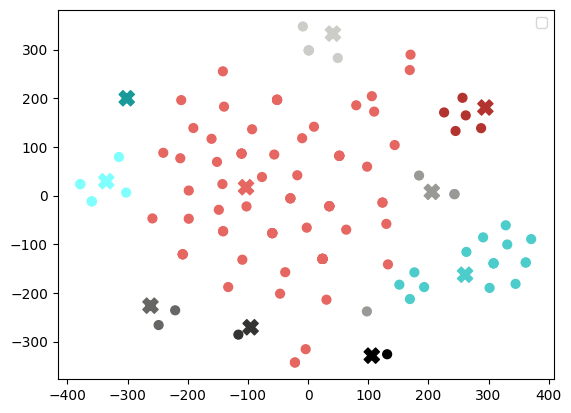

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

n_clusters = len(pycl_clusters)

# –û–ø—Ä–µ–¥–µ–ª—è–µ–º –º–æ–¥–µ–ª—å –∏ —Å–∫–æ—Ä–æ—Å—Ç—å –æ–±—É—á–µ–Ω–∏—è
model = TSNE(random_state=42)

centeres = spreader_hat.kmeans_instance.get_centers()
all_points = np.concatenate([np.array(embeddings), centeres])

# –û–±—É—á–∞–µ–º –º–æ–¥–µ–ª—å
transformed = model.fit_transform(all_points)

# –ü—Ä–µ–¥—Å—Ç–∞–≤–ª—è–µ–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç –≤ –¥–≤—É–º–µ—Ä–Ω—ã—Ö –∫–æ–æ—Ä–¥–∏–Ω–∞—Ç–∞—Ö
xc_axis = transformed[len(words_lists):, 0]
yc_axis = transformed[len(words_lists):, 1]

x_axis = transformed[:len(words_lists), 0]
y_axis = transformed[:len(words_lists), 1]

colors = ["#" + hex(((0xFFFFFF) // n_clusters) * i ).replace("0x", "").zfill(6)
        for i in range(n_clusters)]

print(colors)
color_points = [colors[cls] for cls in kmean_labeles]
#sizes = [30*((i/n_clusters)*1.2 + 1) for i in kmeans.labels_]
plt.scatter(x_axis, y_axis, c=color_points, s=40)

plt.scatter(xc_axis, yc_axis, c=[colors[i] for i in range(len(centeres))], s=120,
            marker="X")

plt.legend()
plt.show()



In [ ]:
#!wget https://rusvectores.org/static/models/rusvectores4/RNC/ruscorpora_upos_skipgram_300_5_2018.vec.gz
!wget https://rusvectores.org/static/models/rusvectores4/ruwikiruscorpora/ruwikiruscorpora_upos_skipgram_300_2_2018.vec.gz

--2023-09-09 20:35:25--  https://rusvectores.org/static/models/rusvectores4/ruwikiruscorpora/ruwikiruscorpora_upos_skipgram_300_2_2018.vec.gz
Resolving rusvectores.org (rusvectores.org)... 172.104.228.108
Connecting to rusvectores.org (rusvectores.org)|172.104.228.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 394697055 (376M) [application/x-gzip]
Saving to: ‚Äòruwikiruscorpora_upos_skipgram_300_2_2018.vec.gz‚Äô

ruwikiruscorpora_up 100%[===================>] 376.41M  19.2MB/s    in 25s     

2023-09-09 20:35:51 (15.2 MB/s) - ‚Äòruwikiruscorpora_upos_skipgram_300_2_2018.vec.gz‚Äô saved [394697055/394697055]



In [ ]:
from gensim.models import KeyedVectors
from gensim.models.phrases import Phrases, Phraser

words_lists = [ans.split() for ans in prepared_texts]

model = KeyedVectors.load_word2vec_format('ruwikiruscorpora_upos_skipgram_300_2_2018.vec.gz', binary=False)

In [ ]:
mystem_tags_to_upos = {
    "A": "ADJ",
    "ADV": "ADV",
    "ADVPRO": "ADV",
    "ANUM": "ADJ",
    "APRO": "DET",
    "COM": "ADJ",
    "CONJ": "SCONJ",
    "INTJ": "INTJ",
    "NONLEX": "X",
    "NUM": "NUM",
    "PART": "PART",
    "PR": "ADP",
    "S": "NOUN",
    "SPRO": "PRON",
    "UNKN": "X",
    "V": "VERB",
}
# np.mean([model[word] for word in words_lists], axis=0)
import numpy


zarray = numpy.zeros(300)

def get_word2vec_embeddings(document):
    tokens = mystem.analyze(document)
    new_tokens = list()
    document_vec = list()

    for token in tokens:
        if token["text"].strip() == "":
            continue
        if not token["analysis"]:
            continue

        # print(token)
        lemma = token["analysis"][0]["lex"]
        part_speech = token["analysis"][0]["gr"].split(",")[0].replace("=", "")
        part_speech = re.match(r"^[A-Z]*", part_speech).group(0)
        upos = mystem_tags_to_upos[part_speech]
        word = f"{lemma}_{upos}"

        try:
            word_vec = model[word]
        except KeyError:
            document_vec.append(zarray)
            print(word)
            continue

        if lemma not in russian_stopwords and lemma != " ":
            if lemma.strip() not in punctuation:
                document_vec.append(word_vec)
                new_tokens.append(lemma)

    return np.mean(document_vec, axis=0)



#lemmatize_word2vec("–∫–∞—Ç–∞–µ—Ç—Å—è —Å–æ —Å–º–µ—Ö—É  –∏—Å–ø—ã—Ç—ã–≤–∞–µ—Ç –æ–±–ª–µ–≥—á–µ–Ω–∏–µ –ø—Ä–∏–≤–µ—Ç")


In [ ]:
words_lists

In [ ]:

em_conv = EmojiConverter()
em_conv.convert_string("ü§£üòå–ø—Ä–∏–≤–µ—Ç")

Downloading...
From: https://drive.google.com/uc?id=1GyWCwQyyWUW_Jt9jh3ZXN0xQkhgWQ39A
To: /content/emoji_dataset.txt
100% 235k/235k [00:00<00:00, 64.1MB/s]


' –∫–∞—Ç–∞–µ—Ç—Å—è —Å–æ —Å–º–µ—Ö—É  –∏—Å–ø—ã—Ç—ã–≤–∞–µ—Ç –æ–±–ª–µ–≥—á–µ–Ω–∏–µ –ø—Ä–∏–≤–µ—Ç'

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# –û–ø—Ä–µ–¥–µ–ª—è–µ–º –º–æ–¥–µ–ª—å –∏ —Å–∫–æ—Ä–æ—Å—Ç—å –æ–±—É—á–µ–Ω–∏—è
model = TSNE(random_state=42)

# –û–±—É—á–∞–µ–º –º–æ–¥–µ–ª—å
transformed = model.fit_transform(np.array(answer_vects))

# –ü—Ä–µ–¥—Å—Ç–∞–≤–ª—è–µ–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç –≤ –¥–≤—É–º–µ—Ä–Ω—ã—Ö –∫–æ–æ—Ä–¥–∏–Ω–∞—Ç–∞—Ö
x_axis = transformed[:, 0]
y_axis = transformed[:, 1]

colors = ["#" + hex(((0xFFFFFF) // n_clusters) * i ).replace("0x", "").zfill(6)
        for i in range(n_clusters)]

print(colors)
color_points = [colors[i] for i in kmeans.labels_]

plt.scatter(x_axis, y_axis, c=color_points, s=[30*((i/n_clusters)*1.2 + 1) for i in kmeans.labels_])
plt.legend()
plt.show()

In [ ]:
pycl_clusters = spreader_hat.get_clusters()

for i, cluster in enumerate(pycl_clusters):
  print(i)
  for j in cluster:
    print(answers[j])
  print()

0
–ª–µ–≤–µ–ª –∞–ø

1
–±–æ–¥—Ä–æ–µ

2
–∫–∞–π—Ñ

3
–±–æ–ª—å—à–µ –∑–Ω–∞–∫–æ–º—Å—Ç–≤!
–∑–Ω–∞–∫–æ–º—Å—Ç–≤–∞
–∑–Ω–∞–∫–æ–º—Å—Ç–≤–æ —Å –∏–Ω—Ç–µ—Ä–µ—Å–Ω—ã–º–∏ –ª—é–¥—å–º
–∏–Ω—Ç–µ—Ä–µ—Å–Ω—ã—Ö –∑–Ω–∞–∫–æ–º—Å—Ç–≤
–ª–∏—á–Ω–æ–µ –∑–Ω–∞–∫–æ–º—Å—Ç–≤–æ
–Ω–æ–≤—ã–µ –∑–Ω–∞–∫–æ–º—Å—Ç–≤–∞
–Ω–æ–≤—ã—Ö –¥—Ä—É–∑–µ–π
–Ω–æ–≤—ã—Ö –∑–Ω–∞–∫–æ–º—Å—Ç–≤
–ø–æ–∑–Ω–∞–∫–æ–º–∏—Ç—å—Å—è
–ø–æ–∑–Ω–∞–∫–æ–º–∏—Ç—å—Å—è —Å
–ø–æ–ª–µ–∑–Ω—ã—Ö –∑–Ω–∞–∫–æ–º—Å—Ç–≤
–∑–Ω–∞–∫–æ–º—Å—Ç–≤–∞ –æ–±–º–µ–Ω—è—Ç—å—Å—è –æ–ø—ã—Ç–æ–º
–∏–Ω—Ç–µ—Ä–µ—Å–Ω—ã–µ –∫–æ–º–º—É–Ω–∏–∫–∞—Ü–∏–∏
–æ–±—â–µ–Ω–∏–µ
–æ–±—â–µ–Ω–∏–µ –≤ –∂–∏–≤—É—é
–æ–±—â–µ–Ω–∏—è

4
—É–∑–Ω–∞—Ç—å –Ω–æ–≤–æ–µ
–Ω–æ–≤–æ–≥–æ
–Ω–æ–≤–æ–µ
—á—Ç–æ-—Ç–æ –Ω–æ–≤–æ–µ

5
–≤–¥–æ—Ö–Ω–æ–≤–µ–Ω–∏–µ
–∏–Ω—Å–∞–π—Ç
–∏–Ω—Å–∞–π—Ç—ã
–º–Ω–æ–≥–æ –∏–Ω—Å–∞–π—Ç–æ–≤
–ø—Ä–æ—Å–≤–µ—Ç–ª–µ–Ω–∏—è
—á—É–¥–∞

6
–≤–µ—Å–µ–ª—å–µ
–ø—Ä–µ–∏—Å–ø–æ–ª–Ω–∏—Ç—å—Å—è
—Å—á–∞—Å—Ç—å–µ
—Å—á–∞—Å—Ç—å—è –∑–Ω–∞–Ω–∏–π

7
–∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é
–∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è
–ø–æ–∑–Ω–∞–≤–∞—Ç–µ–ª—å–Ω—É—é –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é
–ø–æ–ª–µ–∑–Ω–∞—è –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è
–∏–Ω—Ç–µ—Ä–µ—

#–≠–∫–ø–µ—Ä–∏–º–µ–Ω—Ç—ã —Å –ª–µ–º–º–∞—Ç–∏–∑–∞—Ü–∏–µ–π

In [ ]:
import spacy
import ru_core_news_sm

spacy_model = ru_core_news_sm.load()

In [ ]:
import pymystem3

mystem = pymystem3.mystem.Mystem()

In [ ]:
text = """–¥–ª—è –¥–∏—Ç - —Å–±–∞–ª–∞–Ω—Å-–∞–Ω–Ω—ã–π –±—é–¥"""
tokens = mystem.lemmatize(text.lower())
text

In [ ]:
from spellchecker import SpellChecker

spell = SpellChecker(language="ru")


print(spell.correction("–∞—Å–ø–∏—Ä–∞–Ω—Ç—É—Ä–∞"))

In [ ]:
doc = spacy_model(text)

for token in doc:
    print(token.text, token.lemma_, token.pos_, token.dep_)

In [ ]:
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer("russian")
stems = [stemmer.stem(word) for word in text.split()]
stems

In [ ]:
import pymorphy2

morph = pymorphy2.MorphAnalyzer()

In [ ]:
p = morph.parse("–±—é–¥")[0]
print(p.normal_form)